## Charger les données des films

In [9]:
import pandas as pd
import sys
import os
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

#Dire à mon notebook que le dossier src existe
sys.path.append(os.path.abspath(os.path.join("..", "src")))

# Charger le fichier
df = pd.read_csv('D:/PythonProject1/analyze_movie/datas/raw/movie_genre_stats.csv')

df.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


## Objectif - Split des notes

Savoir si un film va faire un succès
Si le film a vendu beaucoup de ticket

### Pourquoi pas "Gross" (le CA)
Plus difficile de déterminer si c'est un succès sans avoir le budget

- Y = Tickets Sold
- X = Le genre et movie released


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

x = df[['Genre', 'Movies Released']]
y = df['Tickets Sold']

# Problème : Le genre est textuelle donc il faut convertir le texte en numérique
# Convertir la colonne textuelle en index
# Stocker la conversion dans une variable nommée preprocessor

categorical_features =  ['Genre']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,  # optionnel, pour noms plus clairs
    force_int_remainder_cols=False    # évite le warning
)

# TODO

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Entrainement

Pour le moment LinearRegression car on ne sait pas encore quel est le meilleur modèle

On veut déjà tester que le code ne crash pas

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Avant : sans colonne transformée
# model = LinearRegression()

# Après : version colonne transformée
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor), #convertir les colonnes Genre en index (texte to numeric)
        ('regressor', LinearRegression())
    ])


model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression())])

In [12]:
# Lancer une prédiction avec les 20% des données splitées
predictions = model.predict(x_test)
print(predictions[:5])

[1.05131133e+07 2.96564318e+06 6.65584938e+07 3.42515453e+08
 5.87225292e+06]


## Afficher erreur de prédictions (Linear Regression)

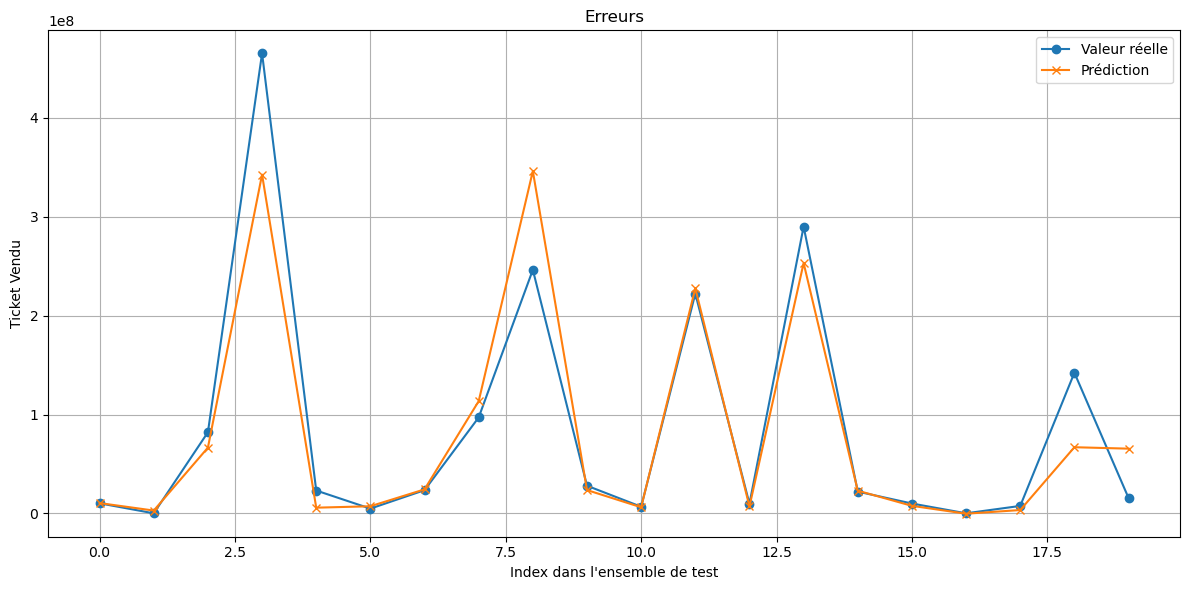

In [13]:
# Importer nos fonctions customs
from graph_utils import display_predic_diff_error

# Appel de la fonction qui va afficher un graph de comparaison entre données prédites et réelles
display_predic_diff_error(y_test, predictions)

## Version RandomForestRegressor

Pour voir si on a de meilleurs résultats de prédictions que LinearRegression

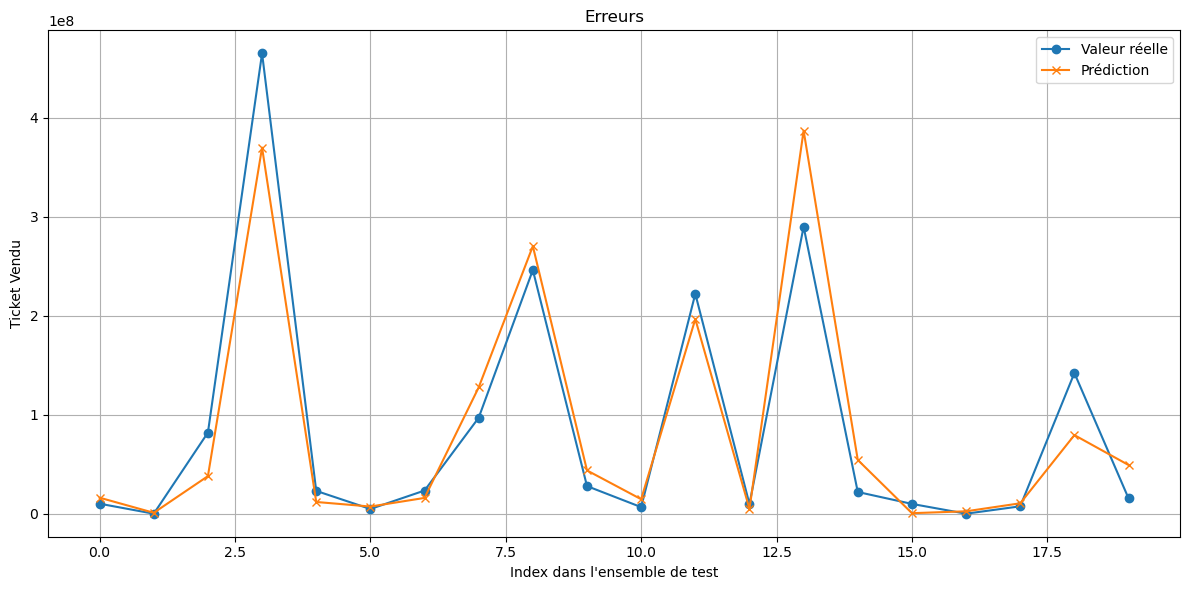

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Modèle RandomForest avec la colonne transformée
model_rfr = Pipeline(
    steps=[
        ('preprocessor', preprocessor), # convertir la colonne Genre en index (textuelle en numérique)
        ('regressor', RandomForestRegressor())
    ]
)

model_rfr.fit(x_train, y_train)

# Lancer une prediction avec les 20% des données splitées
predictions = model_rfr.predict(x_test)

# appler ma fonction va afficher un graph de comparaison entre données prédites et réeles
display_predic_diff_error(y_test, predictions)

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f'MSE : {mse}')

MSE : 2035665947861953.0
